In [90]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from PIL import Image

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
plt.figure(figsize=(10,10))

def get_img(path):
  test_img = Image.open(path)
  plt.subplot(5,5,i)
  plt.imshow(test_img, cmap = "gray")
  test_img = test_img.convert('1')
  test_x = np.array(test_img, np.float32)
  test_x = test_x.reshape([-1, 36])
  return test_x

<Figure size 720x720 with 0 Axes>

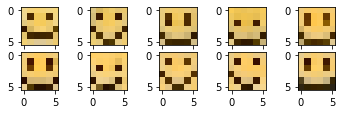

In [93]:
x_train = []
y_train = []
  
path = '/content/drive/My Drive/LABS_NN/LAB2_NN/Smile/1_'
for i in range(1,11,1):
  x_train.append(get_img(path + str(i) +'.jpg')[0])
  y_train.append(1)

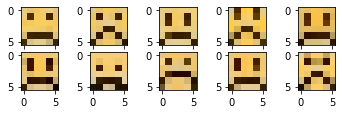

In [94]:
path = '/content/drive/My Drive/LABS_NN/LAB2_NN/Sad/2.'
for i in range(1,11,1):
  x_train.append(get_img(path + str(i) +'.jpg')[0])
  y_train.append(0)

In [95]:
print(x_train[0])

[1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]


In [96]:
def err_los(pred_y, tst_y):
  loss = 0
  for i in range(len(tst_y)):
    loss += np.square(pred_y[i] - tst_y[i])
  loss = np.sqrt(loss) / len(tst_y)
  return loss


In [97]:
def step_func(x):
  if(x > 0):
    return 1
  else:
    return 0

class Neuron:
  def __init__(self, weightsCount, number = None):
    if number is None: 
      self.weights = []
      for i in range(weightsCount):
        self.weights.append(random.randint(-3, 3))
      self.bias = random.randint(-3, 3)
    else:
      self.weights = [] 
      for i in range(weightsCount):
        self.weights.append(number)
      self.bias = number

  def get_sum(self, x):
    sum = self.bias
    for i in range(len(self.weights)):
      sum += self.weights[i] * x[i]
    return sum

  def feed(self, x):
    y = step_func(self.get_sum(x))
    return y

  def print_params(self):
    n_str = ''
    for i in range(len(self.weights)):
      n_str += str(self.weights[i]) + " "
    print(n_str + str(self.bias))

  def change_weights(self, value, x):
    for i in range(len(self.weights)):
      if(x[i] == 1):
        self.weights[i] += value
    self.bias += value

class Network:
  def __init__(self, x_count):
    self.NeuronsL1 = []
    self.NeuronsL2 = []
    self.NeuronsL3 = Neuron(12)
    for i in range(25):
      n = Neuron(x_count)
      self.NeuronsL1.append(n)
    for i in range(12):
      n = Neuron(25)
      self.NeuronsL2.append(n)

  def predict(self, data):
    y_pred = []
    for x in data:
      res1 = []
      for n in self.NeuronsL1:
        res1.append(n.feed(x))
      res2 = []
      for n in self.NeuronsL2:
        res2.append(n.feed(res1))
      y_pred.append(self.NeuronsL3.feed(res2))
    return y_pred

  def trainHebb(self, data, y_trues, epochs):
    accs = []
    errs = []
    epoch_arr = []
    for epoch in range(epochs):
      for x, y_true in zip(data, y_trues):
        res1 = []
        for n in self.NeuronsL1:
          res1.append(n.feed(x))
        res2 = []
        for n in self.NeuronsL2:
          res2.append(n.feed(res1))
        out1 = self.NeuronsL3.feed(res2)
        value = 0.1
        if(out1 > y_true):
          for n in self.NeuronsL1:
            n.change_weights(-value, x)
          for n in self.NeuronsL2:
            n.change_weights(-value, res1)
          self.NeuronsL3.change_weights(-value, res2)
        elif(out1 < y_true):
          for n in self.NeuronsL1:
            n.change_weights(value, x)
          for n in self.NeuronsL2:
            n.change_weights(value, res1)
          self.NeuronsL3.change_weights(value, res2)
      y_preds = self.predict(data)
      acc = accuracy_score(y_trues, y_preds)
      err = err_los(y_trues, y_preds)
      errs.append(err)
      accs.append(acc)
      epoch_arr.append(epoch)
      if epoch % 2 == 1 or acc > 0.98:
        print("Epoch %d acc: %.3f" % (epoch, acc))
        print("Epoch %d err: %.3f" % (epoch, err))
      if acc > 0.98:
        break
    return epoch_arr, errs

In [98]:
network = Network(36)

epochs, errors = network.trainHebb(x_train, y_train, 100)

Epoch 1 acc: 0.500
Epoch 1 err: 0.158
Epoch 3 acc: 0.500
Epoch 3 err: 0.158
Epoch 5 acc: 0.450
Epoch 5 err: 0.166
Epoch 7 acc: 0.500
Epoch 7 err: 0.158
Epoch 9 acc: 0.650
Epoch 9 err: 0.132
Epoch 11 acc: 0.950
Epoch 11 err: 0.050
Epoch 12 acc: 1.000
Epoch 12 err: 0.000


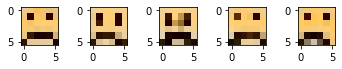

In [99]:

x_test = []
y_test = []
path = '/content/drive/My Drive/LABS_NN/LAB2_NN/TestSad/4_'
for i in range(1,6,1):
  x_test.append(get_img(path + str(i) +'.jpg')[0])
  y_test.append(0)

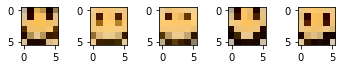

In [100]:
path = '/content/drive/My Drive/LABS_NN/LAB2_NN/TestSmile/3_'
for i in range(1,6,1):
  x_test.append(get_img(path + str(i) +'.jpg')[0])
  y_test.append(1)

acc:0.9


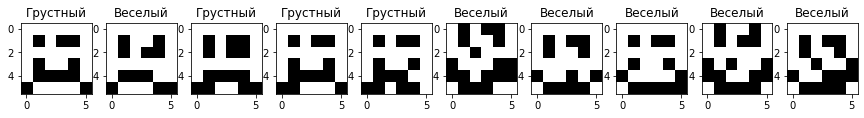

In [101]:
y_pred = network.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("acc:" + str(acc))
ress = ['Грустный', 'Веселый']
plt.figure(figsize=(15,5))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.title(ress[y_pred[i]])
  img = np.reshape((x_test[i]), [6, 6])
  plt.imshow(img, cmap="gray")

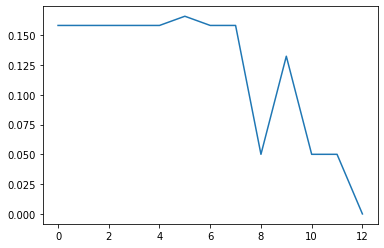

In [102]:
plt.plot(epochs, errors)
plt.show()